In [75]:
import pandas as pd
import file_handler as fh
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [76]:
df = fh.get_diabetes_cvs()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [77]:
len(df)

768

In [78]:
group = df.groupby(["BMI"])


In [79]:
df["BMI"].mean()


31.992578124999998

In [80]:
new_df = df[:100]

In [81]:
#new_df.plot(x="BMI", y="BloodPressure")
mean = df["Glucose"].cumsum()
mean

0        148
1        233
2        416
3        505
4        642
       ...  
763    92385
764    92507
765    92628
766    92754
767    92847
Name: Glucose, Length: 768, dtype: int64

In [82]:
#new_df.plot.scatter(x="Glucose",y="BMI")
#plt.plot(mean[:200]/500)



In [83]:
stats_group = df.groupby(["Glucose", "BMI"])

In [84]:
mean = stats_group["Glucose"].mean
mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000001EB5772CC50>>

Plotting Glucose Deviation

[117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666667 117.42666667 117.42666667 117.42666667 117.42666667
 117.42666

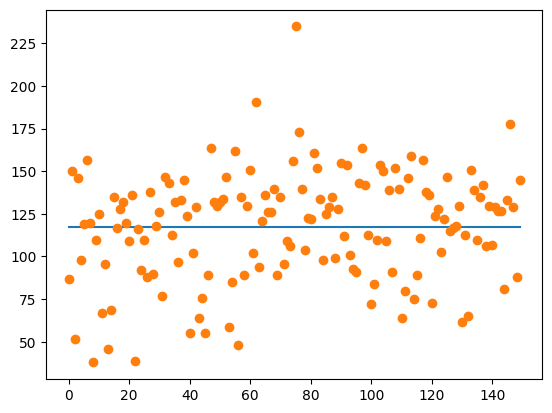

In [85]:
df_sorted = df.sort_values("Glucose")
df_sorted["Glucose"][range(50,100)]
x = np.array(df["Glucose"][:150])
#x
y = np.array(df["BloodPressure"][:30])
z = np.array(df["Insulin"][:30])
a = np.array(df["DiabetesPedigreeFunction"][:30])
len(x)
len(y)
#plt.plot(a,z,'o')
y_av = sum(y)/len(y)
x_av = sum(x)/len(x)
z_av = sum(z)/len(z)
a_av = sum(a)/len(a)

resid_list =  []
final_list = []
for i in range(0,len(x)):
 resid_list.append(x_av - x[i]) 
resid_list
x_av_array = np.linspace(x_av,x_av,150)
print(x_av_array)
#plt.plot(resid_list,'o')
final_list = []
for i in range(0,len(x)):
    final_list.append(resid_list[i] + x_av_array[i])
    
plt.plot(x_av_array)


plot = plt.plot(final_list,'o')


In [86]:
len(x)

150

Plotting Glucose Blood Pressure Relationship

768

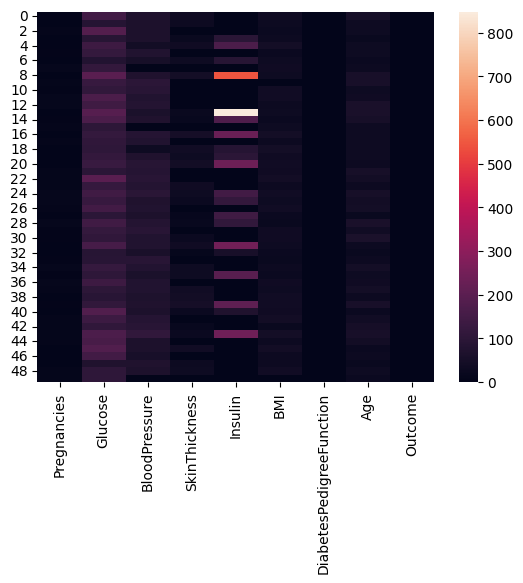

In [87]:
sns.heatmap(df[:50])
len(df)

In [88]:
value_counter = 0
temp_sum = 0
glucose_ds_list = []
for i in range(0,len(df["Glucose"])):
   
    if i % 50 != 0:
        temp_sum = temp_sum + df.loc[i]["Glucose"]
    else:
        glucose_ds_list.append(temp_sum/50)
        temp_sum = 0
glucose_ds_list

[0.0,
 124.42,
 106.44,
 113.14,
 119.34,
 128.8,
 119.06,
 119.0,
 119.16,
 121.94,
 118.8,
 109.48,
 113.28,
 118.92,
 123.06,
 121.04]

In [89]:
temp_sum = 0
insulin_ds_list = []
for i in range(0,len(df["Insulin"])):
    if i % 50 != 0:
        temp_sum = temp_sum + df.loc[i]["Insulin"]
    else:
        insulin_ds_list.append(temp_sum/50)
        
        temp_sum = 0
glucose_ds_list

[0.0,
 124.42,
 106.44,
 113.14,
 119.34,
 128.8,
 119.06,
 119.0,
 119.16,
 121.94,
 118.8,
 109.48,
 113.28,
 118.92,
 123.06,
 121.04]

Next chart takes average for every 50 items from dataframe of 768 and shows heatmap for glucose and insulin

In [90]:
ds_df = pd.DataFrame({"Glucose" : glucose_ds_list, "Insulin" : insulin_ds_list})
ds_df

,Glucose,Insulin
0,0.00,0.00
1,124.42,81.54
2,106.44,65.52
3,113.14,69.34
4,119.34,77.28
5,128.80,103.26
6,119.06,85.14
7,119.00,66.50
8,119.16,95.70
9,121.94,81.38


<Axes: >

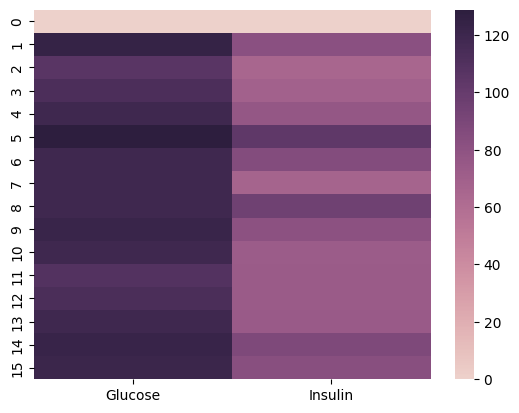

In [92]:
sns.heatmap(ds_df, cmap=sns.cubehelix_palette(as_cmap=True))